# Udacity Data Analyst Nanodegree

## Data Wrangling Project

### We Rate Dogs from Twitter

Prepared by Maria Latysheva, August 2020


### Table of content

<a href = '#introduction'>Introduction</a>

<a href = '#gather'>Gather Data</a>

<a href = '#assess'>Assess Data</a>

<a href = '#clean'>Clean Data</a>

<a href = '#store'>Store Data</a>

<a href = '#analyse'>Analyse and Visualize Data</a>

<a href = '#conclusion'>Conclusion</a>


## <a id = 'introduction'>Introduction</a>

This is the Data Wrangling project as part of the Udacity Data Analyst Nanodegree. The purpose of the project is to use all the knowledge from the course on wrangling and analysing data to create an interesing analysis about We Rate Dogs account from Twitter.

The goals of the projects are:
- to gather data from three different sources
- to clean the data and put it in one or several cleaned master dataframe
- to analyse the dataset and create interesting insights based on the We Rate Dogs data
- to vizualise one of the insights


## <a id = 'gather'>Gather Data</a>

We need to gather data on We Rate Dogs from three different sources.

#### 1) WeRateDogs Twitter archive

In [1676]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

In [1677]:
# read the WeRateDogs archive stored in the twitteer_archive_enhanced.csv file into a dataframe
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [1678]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2) Tweet image predictions

Download tweet image predictions programmatically from the file `image_predictions.tsv`, which is hosted on Udacity's servers. We will use the `Requests` library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [1679]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
image_file = url.split('/')[-1]
with open(os.path.join('./', image_file), mode = 'wb') as file:
    file.write(response.content)

In [1680]:
# read the image predictions file into a dataframe
image_predictions_df = pd.read_csv(image_file, sep = '\\t', engine = 'python')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [1681]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3) Twitter JSON data via Twitter API

Note: Unfortunately, Twitter did not approve my developer's application :-( Although I used the sample wording provided in the project description. I cannot say for sure why this happened but guess that the thing could lie in my country of origin, being Russia at the moment.

For this reason I have to use the txt file provided by Udacity.
However I will post in my Jupyter notebook the code to download this data from the Twitter API.

Using the tweet IDs in the WeRateDogs Twitter archive, we need to query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data is written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1682]:
# Read the JSON tweet_json.txt file into a dataframe

retweets_data = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        id_no = data['id']
        retweets = data['retweet_count']
        likes = data['favorite_count']
        
        json_dict = {'tweet_id': id_no, 'retweet_count': retweets, 'favorite_count': likes}
        retweets_data.append(json_dict)

# convert the tweet JSON data dictionary list to a DataFrame
retweets_json_df = pd.DataFrame(retweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
retweets_json_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8330,38089
1,892177421306343426,6154,32679
2,891815181378084864,4073,24595
3,891689557279858688,8474,41449
4,891327558926688256,9167,39623


In [1683]:
retweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## <a id = 'assess'>Assess Data</a>

In this section, I will assess the data in the three dataset keeping in mind the following Project requirements:
- We only want original ratings (no retweets) 
- The ratings must have images
- We need to assess and clean at least 8 quality issues and at least 2 tidiness issues in these datasets.

#### Twitter Archive

I will start with assessing data in the Twitter archive dataset.

In [1684]:
# Assess the dataset visually by looking at random 5 entries
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate birds but I feel bad cos this one forgot to fly south for the winter. 9/10 just wants a bath https://t.co/o47yitCn9N,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315265683456/photo/1,9,10,None,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Julio. He was one of the original Ringling Bros. Exceptional balance. Very alert. Ready for anything. 10/10 https://t.co/aeURGO9Qs8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042633789440/photo/1,10,10,Julio,None,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
2099,670717338665226240,NaN,NaN,2015-11-28 21:34:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670717338665226240/photo/1,12,10,None,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a great listener. Low maintenance. Hard to get leash on tho. 8/10 still good dog https://t.co/NsDIt8Z80Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412878163972/photo/1,8,10,Jerry,None,None,None,None


##### Issues noted after visual assessment:
- Some tweets are replies and some tweets as retweets, not original tweets
- Some entries do not have expanded_urls (the image is missing)
- Dog status is split among four columns (doggo, floofer, pupper and puppo)

Now let's assess the dataset programmatically.

In [1685]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1686]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1687]:
# Check for duplicates in tweet ids
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1688]:
twitter_archive_df.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Oliver      11 
Lucy        11 
Lola        10 
Penny       10 
Tucker      10 
Bo          9  
Winston     9  
the         8  
Sadie       8  
Bailey      7  
Buddy       7  
Daisy       7  
an          7  
Toby        7  
Bella       6  
Oscar       6  
Milo        6  
Leo         6  
Scout       6  
Stanley     6  
Rusty       6  
Koda        6  
Jack        6  
Dave        6  
Jax         6  
Phil        5  
           ..  
Harvey      1  
Billl       1  
Dex         1  
Florence    1  
Grady       1  
Taco        1  
Rumble      1  
Hamrick     1  
Kingsley    1  
Striker     1  
Jed         1  
Clybe       1  
Jaspers     1  
Tommy       1  
Jomathan    1  
Tom         1  
Geno        1  
Meatball    1  
Ralphé      1  
Caryl       1  
Chaz        1  
Sandra      1  
Hermione    1  
Berkeley    1  
Keet        1  
Schnozz     1  
Jareld      1  
Harry       1  
Ashleigh    1  
Rey         1  
Name: name, Length: 957,

##### Issues identified visually and programmatically:
###### Quality:
- Some tweets are retweets and some are replies
- There are irrelevant columns relating to retweets and replies: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`,	`retweeted_status_timestamp`
- The `name` column contains invalid entries like the words "a", "one"
- There are (2356 - 2297) entries without images
- The columns `timestamp` and `retweeted_status_timestamp` have type `str`
- The max rating_numerator is 1776 and the max rating_denominator is 170, which are well over values that we would expect

##### Tidiness:
- The dog status is split into four columns

#### Image Predictions

Let's first assess the image predictions dataset visually.

In [1689]:
image_predictions_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


##### Issues identified after visual assessment:
- Some images are not identified as the images of a dog.
- p1, p2 and p3 columns and p1_conf, p2_conf and p3_conf, as well as p1_dog, p2_dog and p3_dog have the same type of data but are spread into three columns.

In [1690]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Now let's do some programmatic assessment of the `image predictions` dataset.

In [1691]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1692]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
teddy                        18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
kuvasz                       16 
Italian_greyhound            16 
          

##### Issues identified:
##### Quality:
- Some breeds start with low case letter, some with capital
- Many entries in p1, p2 and p3 do not denote dog breeds but some other things or events.

##### Tidiness:
- The data in columns p1, p2 and p3, as well as the data in columns	p1_conf, p2_conf, and p3_conf are data of the same types but split into many columns
- The columns relevant to the analysis should be merged with the main dataset

#### Twitter JSON Data

Now let's assess the Twitter JSON dataset. 
First, we assets the dataset visually.

In [1693]:
retweets_json_df.sample(5)

,tweet_id,retweet_count,favorite_count
1890,674468880899788800,2148,6382
9,890240255349198849,7229,31363
430,819924195358416896,5282,13702
2258,667455448082227200,60,194
557,801958328846974976,1881,8275


Now let's assess the dataset programmatically.

In [1694]:
retweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [1695]:
retweets_json_df[retweets_json_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [1696]:
retweets_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2934.637607,7976.021795
std,6.832564e+16,4943.049421,12350.111679
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,590.000000,1377.500000
50%,7.186224e+17,1371.000000,3470.500000
75%,7.986954e+17,3420.750000,9766.250000
max,8.924206e+17,83795.000000,164524.000000


#### Issues identified:

##### Quality:
- Nothing to clean.

##### Tidiness:
- This table closely relates to the data in the `twitter archive` table and should be merged with it.

### Issues identified in the course of visual and programmatic data assessment that will be cleaned

#### Quality

##### `twitter archive` table
<a href = '#quality_1'>1) Quality 1:</a> Some tweets are retweets and some are replies. We are interested, however, only in original tweets.

<a href = '#quality_2'>2) Quality 2:</a> The columns relating to retweets and replies are not relevant to our analysis. Same is true about the column `source`.

<a href = '#quality_3'>3) Quality 3:</a> There are some entries without images. We are interested only in entries with images. So these will be classified as missing data.

<a href = '#quality_4'>4) Quality 4:</a> The `name` column contains invalid names like the words "a", "one", etc.

<a href = '#quality_5'>5) Quality 5:</a> The columns `timestamp` and `retweeted_status_timestamp` have type `str` but should be of the `datetime` type.

<a href = '#quality_6'>6) Quality 6:</a> Some rating numerators are either wrong or way too big. Should be limited to the number that appears logical and frequent in many tweets.

<a href = '#quality_7'>7) Quality 7:</a> Some rating denominators are not equal to 10 and are way too big. All denominators should be 10.

##### `image predictions` table

<a href = '#quality_8'>8) Quality 8:</a> Some breeds start with low case letter, some with capital. If breeds contain two words, they are separated by underscore.

##### `twitter json` table
No quality issues detected.

#### Tidiness
<a href = '#tidiness_1'>1) Tidiness 1:</a> The dog status in the `twitter archive` table is split into four columns. There should be one column for the dog status.

<a href = '#tidiness_2'>2) Tidiness 2:</a> Some `expanded_urls` entries in the `twitter archive` table contain duplicate urls split by a comma. Only one url should be for each entry.

<a href = '#tidiness_3'>3) Tidiness 3:</a> Retweets and favourite counts in the `twitter json` table should be part of the `twitter archive` table.

<a href = '#tidiness_4'>4) Tidiness 4:</a> The data in columns p1, p2 and p3 of the `image predictions` table, as well as the data in columns p1_conf, p2_conf, and p3_conf are data of the same types. We can drop unnecessary columns and merge the remaining predictions with the `twitter archive` table.

## <a id = 'clean'>Clean Data</a>

In [1697]:
# Before cleaning any data we need to make copies of the original tables and perform any modifications on the copies.
archive_clean = twitter_archive_df.copy()
images_clean = image_predictions_df.copy()
json_clean = retweets_json_df.copy()

#### `twitter archive`: 

In [1698]:
archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Axel. He's a professional leaf catcher. 12/10 gifted af https://t.co/P8bgOMMTRs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1",12,10,Axel,None,None,None,None


#### <a id = 'quality_1'>Quality issue No. 1: Some tweets are retweets and some are replies</a>

##### Define
Keep only the entries that are original tweets (are not replies or retweets). 
Delete rows that are replies by keeping the rows where the value in the `in_reply_to_status_id` is NaN.
Delete rows that are retweets by keeping the rows where the value in the `retweeted_status_id` column is NaN.
Then delete the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` by using the `drop` method.

##### Code

In [1699]:
archive_clean.in_reply_to_status_id.notnull().value_counts()

False    2278
True     78  
Name: in_reply_to_status_id, dtype: int64

In [1700]:
archive_clean.retweeted_status_id.notnull().value_counts()

False    2175
True     181 
Name: retweeted_status_id, dtype: int64

In [1701]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

In [1702]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

##### Test

In [1703]:
archive_clean.in_reply_to_status_id.notnull().value_counts()

False    2097
Name: in_reply_to_status_id, dtype: int64

In [1704]:
archive_clean.retweeted_status_id.notnull().value_counts()

False    2097
Name: retweeted_status_id, dtype: int64

#### <a id = 'quality_2'>Quality issue No. 2: There are irrelevant columns relating to retweets and replies:</a>
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`,	`retweeted_status_timestamp`
as well as the column `source` that will not be used for our analysis

##### Define
Delete the irrelevant columns by using the `drop` method.

##### Code

In [1705]:
archive_clean = archive_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                    'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

##### Test

In [1706]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


#### <a id = 'quality_3'>Quality issue No. 3: There are some entries without images - missing data.</a>

##### Define
Delete the entries that do not have images by keeping only those entries that have non-null `expanded_urls` values.

##### Code

In [1707]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### Test

In [1708]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(8)
memory usage: 196.3+ KB


#### <a id = 'quality_4'>Quality issue No. 4: The columns `timestamp` and `retweeted_status_timestamp` have type `str`</a>

##### Define
Change the type of the `timestamp` column to datetime by using pandas' `to_datetime` method.
The column `retweeted_status_timestamp` has already been dropped.

##### Code

In [1709]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

##### Test

In [1710]:
archive_clean.dtypes

tweet_id              int64              
timestamp             datetime64[ns, UTC]
text                  object             
expanded_urls         object             
rating_numerator      int64              
rating_denominator    int64              
name                  object             
doggo                 object             
floofer               object             
pupper                object             
puppo                 object             
dtype: object

#### <a id = 'quality_5'>Quality issue No. 5: The name column contains invalid entries like the words "a", "one".</a>


##### Define
Replace all words starting with a lowcase letter with `None` by using pandas' `str.replace` function and the regular expression mechanism.

##### Code

In [1711]:
# Find the entries in the "name" column that start with a lowcase letter or a digit
invalid_names = archive_clean.name.str.contains('^[a-z]|\d+')
archive_clean[invalid_names].name.value_counts()

a               55
the             8 
an              6 
very            4 
one             4 
quite           3 
just            3 
not             2 
actually        2 
getting         2 
such            1 
my              1 
his             1 
officially      1 
unacceptable    1 
space           1 
incredibly      1 
mad             1 
this            1 
infuriating     1 
light           1 
all             1 
old             1 
by              1 
life            1 
Name: name, dtype: int64

In [1712]:
# Replace all entries with invalid names with the string "None"

archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'None', regex = True)

##### Test

In [1713]:
invalid_names = archive_clean.name.str.contains('^[a-z]|\d+')
archive_clean[invalid_names].name.value_counts()

Series([], Name: name, dtype: int64)

#### <a id = 'quality_6'>Quality issue No. 6: Some rating denominators seem to have wrong or way too big values</6>

##### Define
Enter the correct values for the numerator and denominator for the following tweet_ids: 740373189193256964 (14/10), 716439118184652801 (11/10), 682962037429899265 (10/10) and 666287406224695296 (9/10)

Drop all other entries with the denominator greater than 10. Such dropped entires are mostly for multiple dogs.

##### Code

In [1714]:
# Inspect the enteries where the denominator is greater than 10
denominators_not_10 = archive_clean[archive_clean['rating_denominator'] != 10]
pd.set_option('display.max_colwidth', -1)
denominators_not_10[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [1715]:
archive_clean.loc[archive_clean['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
archive_clean.loc[archive_clean['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10

In [1716]:
archive_clean.loc[archive_clean['tweet_id'] == 716439118184652801, 'rating_numerator'] = 11
archive_clean.loc[archive_clean['tweet_id'] == 716439118184652801, 'rating_denominator'] = 10

In [1717]:
archive_clean.loc[archive_clean['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10
archive_clean.loc[archive_clean['tweet_id'] == 682962037429899265, 'rating_denominator'] = 10

In [1718]:
archive_clean.loc[archive_clean['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
archive_clean.loc[archive_clean['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

In [1719]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

##### Test

In [1720]:
# archive_clean[archive_clean['rating_denominator'] != 10]
archive_clean.rating_denominator.value_counts()

10    2081
Name: rating_denominator, dtype: int64

##### Additional issue detected: 
Since all the denominators are now equal to 10, I will drop the column `rating_denominator`.
We can now rename the column `rating_numerator` to `rating`.

In [1721]:
# Code
archive_clean = archive_clean.drop('rating_denominator', 1)
archive_clean.rename(columns = {'rating_numerator':'rating'}, inplace=True)

In [1722]:
# Test
list(archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### <a id = 'quality_7'>Quality issue No. 7: Some rating numerators seem to have wrong or way too big values</a>

##### Define
Enter the correct values for the numerator for the following tweet_ids: 786709082849828864 (10), 778027034220126208 (11) and 680494726643068929 (11). I will round up the numerators to the nearest integer.

Drop all other entries with the numerator greater than 14 as the ratings up to 14 are used quite often while after 14 there are only 5 entries with ratings way heigher than 14.

##### Code

In [1723]:
# Check the distribution of numerators (rating)
archive_clean.rating.value_counts().sort_index()

0       1  
1       4  
2       9  
3       19 
4       15 
5       34 
6       32 
7       51 
8       98 
9       153
10      435
11      414
12      485
13      287
14      39 
26      1  
27      1  
75      1  
420     1  
1776    1  
Name: rating, dtype: int64

In [1724]:
numerators_more_14 = archive_clean[archive_clean['rating'] > 14]
pd.set_option('display.max_colwidth', -1)
numerators_more_14[['tweet_id', 'text', 'rating']]

,tweet_id,text,rating
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420


In [1725]:
archive_clean.loc[archive_clean['tweet_id'] == 786709082849828864, 'rating'] = 10
archive_clean.loc[archive_clean['tweet_id'] == 778027034220126208, 'rating'] = 11
archive_clean.loc[archive_clean['tweet_id'] == 680494726643068929, 'rating'] = 11

In [1726]:
archive_clean = archive_clean[archive_clean['rating'] < 15]

##### Test

In [1727]:
archive_clean.rating.value_counts().sort_index()

0     1  
1     4  
2     9  
3     19 
4     15 
5     34 
6     32 
7     51 
8     98 
9     153
10    436
11    416
12    485
13    287
14    39 
Name: rating, dtype: int64

#### <a id = 'quality_8'>Quality issue No. 8: Some breeds in the `image predictions` table start with low case letter, some with capital</a>

In [1728]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define

In the column `p1` split the breed into several words using `str.split` method and underscore as the separator. Then use `str.join` method to join resulting list into one string.
Replace the lowcase letter at the beginning with the capital letter by using `str.capitalize` method.

#### <a id = 'tidiness_1'>Tidiness issue No. 1: The dog status in the twitter archive table is split into four columns</a>

##### Code

In [1729]:
images_clean['p1'] = images_clean['p1'].str.split('_').str.join(' ').str.capitalize()

##### Test

In [1730]:
images_clean.p1.value_counts().sample(5)

Tibetan terrier     4 
Border collie       12
Wombat              4 
Doormat             8 
Desktop computer    1 
Name: p1, dtype: int64

##### Define
Melt the columns `doggo`, `floofer`, `pupper` and `puppo` into one column by using the pandas' `melt` function. Then drop the extra artificial column `dog` and delete all duplicates caused by the melting.

##### Code

In [1731]:
archive_clean.sample()

,tweet_id,timestamp,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo
1355,703611486317502464,2016-02-27 16:03:45+00:00,Meet Scooter. He's experiencing the pupper equivalent of dropping ur phone in a toilet 10/10 put it in some rice pup https://t.co/JSmX1FIEaW,https://twitter.com/dog_rates/status/703611486317502464/photo/1,10,Scooter,None,None,pupper,None


In [1732]:
archive_clean.doggo.value_counts()

None     1996
doggo    83  
Name: doggo, dtype: int64

In [1733]:
archive_clean.floofer.value_counts()

None       2069
floofer    10  
Name: floofer, dtype: int64

In [1734]:
archive_clean.pupper.value_counts()

None      1850
pupper    229 
Name: pupper, dtype: int64

In [1735]:
archive_clean.puppo.value_counts()

None     2055
puppo    24  
Name: puppo, dtype: int64

In [1736]:
# Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns to the 'dogs' and 'dog_status' columns

archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating', 'name'],
                        var_name = 'dogs', value_name='dog_status')

In [1737]:
# Delete the artificial column 'dogs'
archive_clean = archive_clean.drop('dogs', 1)

In [1738]:
# Delete the duplicates created as a result of the melting function
archive_clean = archive_clean.sort_values('dog_status').drop_duplicates(subset='tweet_id', keep='last')

##### Test

In [1739]:
archive_clean.dog_status.value_counts()

None       1744
pupper     229 
doggo      72  
puppo      24  
floofer    10  
Name: dog_status, dtype: int64

#### <a id = 'tidiness_2'>Tidiness issue No. 2: Some `expanded_urls` entries countain duplicate urls split by a comma</a>

##### Define

Keep only the first url before the comma by using `str.split` method

##### Code

In [1740]:
archive_clean.expanded_urls = archive_clean.expanded_urls.str.split(',').str[0]

##### Test

In [1741]:
archive_clean.expanded_urls.value_counts().sample(10)

https://twitter.com/dog_rates/status/670807719151067136/photo/1    1
https://twitter.com/dog_rates/status/753655901052166144/photo/1    1
https://twitter.com/dog_rates/status/842163532590374912/photo/1    1
https://twitter.com/dog_rates/status/677644091929329666/video/1    1
https://twitter.com/dog_rates/status/683078886620553216/photo/1    1
https://twitter.com/dog_rates/status/712717840512598017/photo/1    1
https://vine.co/v/ihWIxntjtO7                                      1
https://twitter.com/dog_rates/status/806219024703037440/photo/1    1
https://twitter.com/dog_rates/status/674416750885273600/photo/1    1
https://twitter.com/dog_rates/status/771102124360998913/photo/1    1
Name: expanded_urls, dtype: int64

#### <a id = 'tidiness_3'>Tidiness issue No. 3: The `retweets` table should be part of the `twitter archive` table</a>

##### Define

Merge the `retweets` table into the `twitter archive` table, joining on `tweet_id`

##### Code

In [1742]:
archive_clean = pd.merge(archive_clean, json_clean, on = ['tweet_id'], how = 'left')

##### Test

In [1743]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 9 columns):
tweet_id          2079 non-null int64
timestamp         2079 non-null datetime64[ns, UTC]
text              2079 non-null object
expanded_urls     2079 non-null object
rating            2079 non-null int64
name              2079 non-null object
dog_status        2079 non-null object
retweet_count     2077 non-null float64
favorite_count    2077 non-null float64
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 162.4+ KB


#### Additional issues: There are two missing value entries for retweet_count and favorite_count columns and the type of `retweet_count` and `favorite_count` changed to float64 after the merge.

In [1744]:
archive_clean[archive_clean.retweet_count.isna()]

,tweet_id,timestamp,text,expanded_urls,rating,name,dog_status,retweet_count,favorite_count
910,680055455951884288,2015-12-24 16:00:30+00:00,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh",https://twitter.com/dog_rates/status/680055455951884288/photo/1,10,Sammy,None,NaN,NaN
1550,754011816964026368,2016-07-15 17:56:40+00:00,This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,https://twitter.com/dog_rates/status/754011816964026368/photo/1,12,Charlie,None,NaN,NaN


##### Define
Delete the entries that have missing `retweet_count` or `favorite_count` values. Change the type of these columns to `int`.

##### Code

In [1745]:
archive_clean = archive_clean[archive_clean['retweet_count'].notna()]
archive_clean = archive_clean[archive_clean['favorite_count'].notna()]

In [1746]:
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

##### Test

In [1747]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2078
Data columns (total 9 columns):
tweet_id          2077 non-null int64
timestamp         2077 non-null datetime64[ns, UTC]
text              2077 non-null object
expanded_urls     2077 non-null object
rating            2077 non-null int64
name              2077 non-null object
dog_status        2077 non-null object
retweet_count     2077 non-null int64
favorite_count    2077 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 162.3+ KB


#### <a id = 'tidiness_4'>Tidiness issue No. 4: In the `predictions` table there are many columns that will not be used for our analysis.<a> 
    
We are actually only interested in the most likely breed of the dog, which is stored in column `p1`. And I will also keep the confidence level `p1_conf` and `p1_dog`.
    
These columns will be merged with the `twitter archive` table to become the master dataset for further analysis.

##### Define

Keep only the columns with tweet_id and the breed by using the function `drop`.

In [1748]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1749]:
images_clean.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

##### Code

In [1750]:
images_clean = images_clean.drop(['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [1751]:
archive_clean = pd.merge(archive_clean, images_clean, on = 'tweet_id', how = 'left')

##### Test

In [1752]:
images_clean.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh springer spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German shepherd,0.596461,True
3,666044226329800704,Rhodesian ridgeback,0.408143,True
4,666049248165822465,Miniature pinscher,0.560311,True


In [1753]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating,name,dog_status,retweet_count,favorite_count,p1,p1_conf,p1_dog
0,667405339315146752,2015-11-19 18:13:27+00:00,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,Biden,None,221,472,Saint bernard,0.381377,True
1,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,None,None,84,308,Rottweiler,0.999091,True
2,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,None,None,242,453,Porcupine,0.989154,False
3,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,None,None,590,788,Goose,0.980815,False
4,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,Cupcake,None,91,315,Labrador retriever,0.825670,True


##### Final steps to prepare the master dataset for analysis:
- Rearrange the columns by moving the text columns to the right of the table
- Rename 'p1', 'p1_conf' and 'p1_dog' columns to make their names more explicit
- Save the cleaned dataset to a master csv file

In [1754]:
# Rearrange the columns to move the text columns to the right
archive_clean = archive_clean[['tweet_id', 'timestamp', 'favorite_count', 'retweet_count', 'rating',
                               'p1', 'p1_conf', 'p1_dog', 'name', 'dog_status', 'text', 'expanded_urls',]]
# Rename the colums
archive_clean = archive_clean.rename(columns={'p1': 'breed', 'p1_conf': 'breed_conf', 'p1_dog': 'dog_or_not'})

In [1755]:
archive_clean.head(3)

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
0,667405339315146752,2015-11-19 18:13:27+00:00,472,221,7,Saint bernard,0.381377,True,Biden,None,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1
1,667435689202614272,2015-11-19 20:14:03+00:00,308,84,12,Rottweiler,0.999091,True,None,None,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1
2,667437278097252352,2015-11-19 20:20:22+00:00,453,242,10,Porcupine,0.989154,False,None,None,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1


## <a id = 'store'>Store Data</a>

I have cleaned all the issues that had to be cleaned before we can proceed to analysing the dataset.

After cleaning all data is accumulated in one dataset - `archive_clean`.

Now I will store the master dataset into a master csv file.

In [1756]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

## <a id = 'analyse'>Analyse and Visualise Data</a>

Now let's proceed to analysing and visualising the cleaned dataset.

In the analysis, I want to answer the following questions about the We Rate Dogs dataset:

<a href = '#question_1'>1) Question 1:</a> Is there a strong correlation between retweets and favourite counts? Is there a strong correlation between the favourite counts and the rating?

<a href = '#question_2'>2) Question 2:</a> What are the top ten favourite breeds?

<a href = '#question_3'>3) Question 3:</a> Which dog status has the highest average rating?

<a href = '#question_4'>4) Question 4:</a> What is the distribution of ratings? Which rating is most common?


In [1757]:
# Import the master dataset from the clean master csv file

master_df = pd.read_csv('twitter_archive_master.csv')

In [1758]:
master_df.head(3)

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
0,667405339315146752,2015-11-19 18:13:27+00:00,472,221,7,Saint bernard,0.381377,True,Biden,None,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1
1,667435689202614272,2015-11-19 20:14:03+00:00,308,84,12,Rottweiler,0.999091,True,None,None,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1
2,667437278097252352,2015-11-19 20:20:22+00:00,453,242,10,Porcupine,0.989154,False,None,None,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1


In [1759]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 12 columns):
tweet_id          2077 non-null int64
timestamp         2077 non-null object
favorite_count    2077 non-null int64
retweet_count     2077 non-null int64
rating            2077 non-null int64
breed             1954 non-null object
breed_conf        1954 non-null float64
dog_or_not        1954 non-null object
name              2077 non-null object
dog_status        2077 non-null object
text              2077 non-null object
expanded_urls     2077 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 194.8+ KB


In [1760]:
master_df[master_df['breed'].isnull()]

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
137,875097192612077568,2017-06-14 21:06:43+00:00,27016,5972,13,NaN,NaN,NaN,None,None,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,https://twitter.com/drboondoc/status/874413398133547008
142,876537666061221889,2017-06-18 20:30:39+00:00,23155,4568,14,NaN,NaN,NaN,None,None,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,https://twitter.com/mpstowerham/status/876162994446753793
176,885518971528720385,2017-07-13 15:19:09+00:00,20086,3687,14,NaN,NaN,NaN,None,None,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960
203,878604707211726852,2017-06-24 13:24:20+00:00,29771,7084,13,NaN,NaN,NaN,None,None,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,https://twitter.com/bbcworld/status/878599868507402241
205,884247878851493888,2017-07-10 03:08:17+00:00,71791,20100,13,NaN,NaN,NaN,None,None,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809
216,690989312272396288,2016-01-23 20:07:44+00:00,6208,3065,12,NaN,NaN,NaN,None,None,We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy https://t.co/pmarb2dG0e,https://vine.co/v/iOZKZEU2nHq
226,691793053716221953,2016-01-26 01:21:31+00:00,8517,4481,10,NaN,NaN,NaN,None,None,We usually don't rate penguins but this one is in need of a confidence boost after that slide. 10/10 https://t.co/qnMJHBxPuo,https://vine.co/v/OTTVAKw6YlW
229,692041934689402880,2016-01-26 17:50:29+00:00,3570,1359,13,NaN,NaN,NaN,Teddy,None,This is Teddy. His head is too heavy. 13/10 (vid by @jooanrim) https://t.co/sRUpRpGZ3y,https://vine.co/v/iiI3wmqXYmA
233,690348396616552449,2016-01-22 01:40:58+00:00,1585,549,12,NaN,NaN,NaN,Oddie,None,This is Oddie. He's trying to communicate. 12/10 very solid effort (vid by @kaleseyy) https://t.co/JjxriLqZOL,https://vine.co/v/iejBWerY9X2
243,689255633275777024,2016-01-19 01:18:43+00:00,2689,1159,10,NaN,NaN,NaN,Ferg,None,This is Ferg. He swallowed a chainsaw. 1 like = 1 prayer 10/10 remain calm Ferg (vid by @calebturer) https://t.co/gOH51Y8Yh1,https://vine.co/v/iOL792n5hz2


There are 123 entries with missing breed information. However, I will keep these entries to use in answering questions 1, 3 and 4.

In [1761]:
master_df[master_df['dog_or_not'] == False]

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
2,667437278097252352,2015-11-19 20:20:22+00:00,453,242,10,Porcupine,0.989154,False,None,None,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1
3,667443425659232256,2015-11-19 20:44:47+00:00,788,590,6,Goose,0.980815,False,None,None,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1
12,667524857454854144,2015-11-20 02:08:22+00:00,1716,1127,12,Hare,0.447893,False,None,None,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1
18,667549055577362432,2015-11-20 03:44:31+00:00,5859,2325,1,Electric fan,0.984377,False,None,None,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1
19,667724302356258817,2015-11-20 15:20:54+00:00,489,325,7,Ibex,0.619098,False,None,None,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,https://twitter.com/dog_rates/status/667724302356258817/photo/1
21,667766675769573376,2015-11-20 18:09:16+00:00,447,221,9,Fire engine,0.883493,False,Calvin,None,This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af https://t.co/3Bbba7y8Xe,https://twitter.com/dog_rates/status/667766675769573376/photo/1
23,667782464991965184,2015-11-20 19:12:01+00:00,414,249,9,Lorikeet,0.466149,False,None,None,Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x,https://twitter.com/dog_rates/status/667782464991965184/photo/1
26,667806454573760512,2015-11-20 20:47:20+00:00,1069,507,10,Toyshop,0.253089,False,Filup,None,This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,https://twitter.com/dog_rates/status/667806454573760512/photo/1
29,667369227918143488,2015-11-19 15:49:57+00:00,370,167,10,Teddy,0.709545,False,None,None,Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/LEaviT37v1,https://twitter.com/dog_rates/status/667369227918143488/photo/1
33,666776908487630848,2015-11-18 00:36:17+00:00,351,175,5,Seat belt,0.375057,False,Josep,None,This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,https://twitter.com/dog_rates/status/666776908487630848/photo/1


There are 504 entries where the breed was not identified. I will keep these entries to use in answering questions 1, 3 and 4.

In [1762]:
master_df.describe()

,tweet_id,favorite_count,retweet_count,rating,breed_conf
count,2.077000e+03,2077.000000,2077.000000,2077.000000,1954.000000
mean,7.366309e+17,8849.408281,2734.363024,10.606644,0.594123
std,6.725202e+16,12814.253148,4774.787424,2.153953,0.272186
min,6.660209e+17,80.000000,12.000000,0.000000,0.044333
25%,6.766175e+17,1952.000000,601.000000,10.000000,0.362656
50%,7.095662e+17,4012.000000,1320.000000,11.000000,0.587440
75%,7.880396e+17,11035.000000,3117.000000,12.000000,0.846896
max,8.924206e+17,164524.000000,83795.000000,14.000000,1.000000


In [1763]:
# import necessary libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
sns.set_style('darkgrid')

#### <a id = 'question_1'>1) Question 1: Is there a strong correlation between retweets and favourite counts? Is there a strong correlation between the favourite counts and the rating?</a>

In [1764]:
# Define a function to plot possible correlation between two indicators
def scatter_plot(df, xcol, ycol, x_label, y_label):
    plt.figure(figsize=(12,7))
    plt.scatter(df[xcol], df[ycol], c = "b", s = 3**2, zorder = 2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('The correlation between {} and {}'.format(x_label, y_label))
    plt.show()

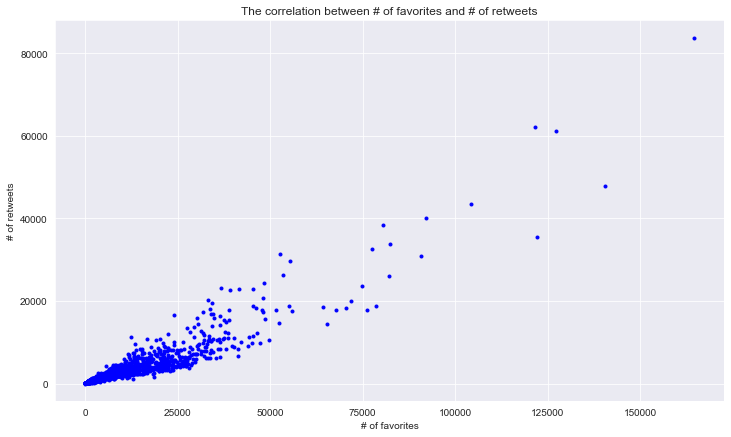

In [1765]:
# Plot the scatter plot to see if there is an apparent correlation between retweets and favorite counts

scatter_plot(master_df, 'favorite_count', 'retweet_count', '# of favorites', '# of retweets')

From the scatter plot above, we see that there is indeed a positive correlation between the number of favorites and the number of retweets.

Let's calculated the Pearson's correlation coefficient now.

In [1766]:
# Calculate the Pearson correlation coefficient
from scipy.stats.stats import pearsonr
pearson = pearsonr(master_df['favorite_count'], master_df['retweet_count'])
pearson[0]

0.92720773724973

**Conclusion:** Since the Peason's correlation coefficient is positive 0.93, there is a strong correlation between the number of favorites and the number of retweets.

Let's now investigate the correlation between the number of favorites and the rating of a dog.

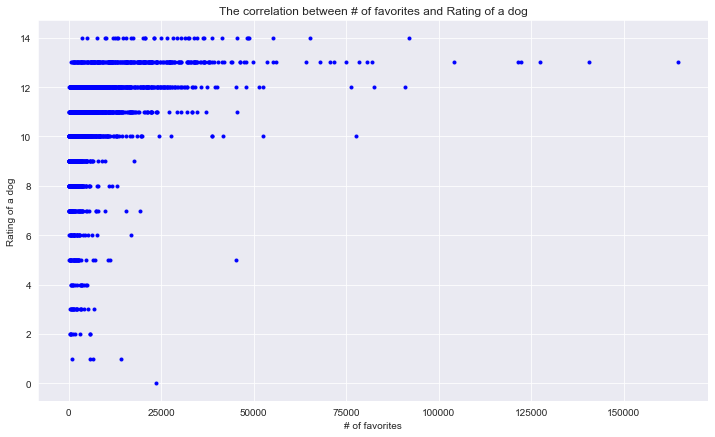

In [1767]:
# Plot the scatter plot to see the correlation between the number of favorites and the rating of a dog
scatter_plot(master_df, 'favorite_count', 'rating', '# of favorites', 'Rating of a dog')

In [1768]:
# Calculate the corresponding Pearson's correlation coefficient
pearson_rating = pearsonr(master_df['favorite_count'], master_df['rating'])
pearson_rating[0]

0.3890115563054569

**Conclusion:** Surprisingly, the correlation between the number of favorites and the rating of a dog is weak with the pearson's coefficient being as low as 0.39.

<a id = 'question_2'> 2) Question 2: What are the top ten most frequent and most favourited breeds?</a>

In [1769]:
master_df.sample(5)

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
1944,689143371370250240,2016-01-18 17:52:38+00:00,2124,549,10,English springer,0.303781,True,Trip,pupper,Meet Trip. He likes wearing costumes that aren't consistent with the season to screw with people 10/10 tricky pupper https://t.co/40w7TI5Axv,https://twitter.com/dog_rates/status/689143371370250240/photo/1
1140,814530161257443328,2016-12-29 17:54:58+00:00,9261,2033,12,Miniature poodle,0.626913,True,Alf,None,This is Alf. Someone just rubbed a balloon on his head. He's only a little pupset about it. 12/10 would pet well https://t.co/IOdgfnSE9G,https://twitter.com/dog_rates/status/814530161257443328/photo/1
570,706346369204748288,2016-03-06 05:11:12+00:00,3615,983,12,Tibetan mastiff,0.956462,True,Koda,None,This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6,https://twitter.com/dog_rates/status/706346369204748288/photo/1
238,688804835492233216,2016-01-17 19:27:24+00:00,1008,208,12,Malinois,0.199512,True,None,None,When you stumble but recover quickly cause your crush is watching. 12/10 https://t.co/PMeq6IedU7,https://twitter.com/dog_rates/status/688804835492233216/photo/1
1832,789903600034189313,2016-10-22 18:57:48+00:00,11153,4535,13,NaN,NaN,NaN,Ralphy,pupper,This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,https://vine.co/v/5wPT1aBxPQZ


To answer this question I will analyse the dataset in terms of which breads were the most common in the dataset and which breeds received the most favourite counts.

In [1770]:
# First select only those rows for which there is a breed of the dog and the photo is recognised as the photo of a dog.

breed_df = master_df[master_df['dog_or_not'] == True]
breed_df.sample(5)

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
744,669000397445533696,2015-11-24 03:51:38+00:00,21226,6541,11,Pembroke,0.822940,True,Terrance,None,Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/ixcuUYCbdD,https://twitter.com/dog_rates/status/669000397445533696/photo/1
221,691444869282295808,2016-01-25 02:17:57+00:00,2785,901,12,Bernese mountain dog,0.767563,True,Bailey,None,This is Bailey. She likes flowers. 12/10 https://t.co/YBENhr24FV,https://twitter.com/dog_rates/status/691444869282295808/photo/1
1960,690015576308211712,2016-01-21 03:38:27+00:00,2647,790,12,Malamute,0.949609,True,None,pupper,This pupper can only sleep on shoes. It's a crippling disease. Tearing his family apart. 12/10 I'd totally pet tho https://t.co/03XlvS8izg,https://twitter.com/dog_rates/status/690015576308211712/photo/1
1667,767754930266464257,2016-08-22 16:06:54+00:00,17047,5849,11,Vizsla,0.307794,True,Philbert,None,This is Philbert. His toilet broke and he doesn't know what to do. Trying not to panic. 11/10 furustrated af https://t.co/Nb68IsVb9O,https://twitter.com/dog_rates/status/767754930266464257/photo/1
1867,730573383004487680,2016-05-12 01:40:42+00:00,5145,2296,10,American staffordshire terrier,0.810158,True,Rooney,pupper,This is Rooney. He can't comprehend glass. 10/10 it'll be ok pupper https://t.co/CnUl2uDBBV,https://twitter.com/dog_rates/status/730573383004487680/photo/1


In [1771]:
top10_occurrence = breed_df.breed.value_counts().head(10)
top10_occurrence

Golden retriever      135
Labrador retriever    91 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Chow                  41 
Samoyed               39 
Pomeranian            38 
Toy poodle            37 
Malamute              29 
Name: breed, dtype: int64

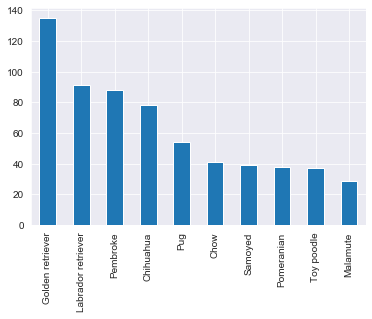

In [1772]:
# Plot a categorical chart to show the distribution of the top ten breeds

breed_df['breed'].value_counts().head(10).plot(kind='bar');

**Conclusion:** The most frequent breeds are Golden retriever and Labrador retriever. Toy poodle and Malamute are at the 9th and 10th places of the top ten rating in term of frequency.

Now let's see the top ten breeds in terms of most favorited tweets.

In [1773]:
top_favorited = breed_df.groupby('breed')['favorite_count'].sum().sort_values(ascending = False)
top10_favorited = top_favorited.head(10)
top10_favorited

breed
Golden retriever      1647296
Labrador retriever    1099054
Pembroke              975351 
Chihuahua             674469 
Samoyed               504325 
French bulldog        458651 
Chow                  399311 
Pug                   307385 
Cocker spaniel        303189 
Pomeranian            297393 
Name: favorite_count, dtype: int64

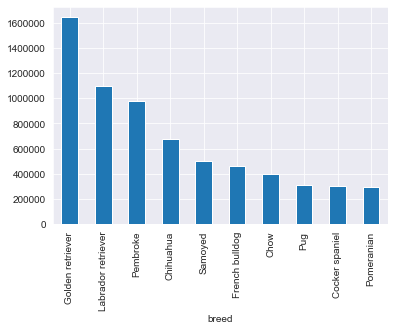

In [1774]:
breed_df.groupby('breed')['favorite_count'].sum().sort_values(ascending = False).head(10).plot(kind='bar');

**Conclusion:** The distribution of the top ten breeds in terms of most favorited is different from the distribution of the top ten breeds in terms of occurrence. The first four breeds are the same: Golden Retriever, Labrador Retriever, Pemroke and Chihuahua but the other 6 breeds take either different places or are different in the two ratings.

<a id = 'question_3'> 3) Question 3: Which dog status has the highest average rating?</a>

To answer this question I will select only the entries where the `dog status` is not `None`.

In [1775]:
status_df = master_df[master_df['dog_status'] != 'None']

In [1776]:
status_df.sample(5)

,tweet_id,timestamp,favorite_count,retweet_count,rating,breed,breed_conf,dog_or_not,name,dog_status,text,expanded_urls
2063,822872901745569793,2017-01-21 18:26:02+00:00,140616,47772,13,Lakeland terrier,0.196015,True,None,puppo,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1
1833,683834909291606017,2016-01-04 02:18:42+00:00,2759,1189,9,Maltese dog,0.738449,True,None,pupper,Here we see a faulty pupper. Might need to replace batteries. Try turning off &amp; back on again. 9/10 would still pet https://t.co/O1E4AtHVxO,https://twitter.com/dog_rates/status/683834909291606017/video/1
1926,819238181065359361,2017-01-11 17:42:57+00:00,2430,441,10,NaN,NaN,NaN,None,pupper,Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv,http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_
1985,674638615994089473,2015-12-09 17:15:54+00:00,1725,605,12,Pomeranian,0.846986,True,None,pupper,This pupper is fed up with being tickled. 12/10 I'm currently working on an elaborate heist to steal this dog https://t.co/F33n1hy3LL,https://twitter.com/dog_rates/status/674638615994089473/photo/1
1894,803638050916102144,2016-11-29 16:33:36+00:00,11781,4544,13,Labrador retriever,0.372776,True,None,pupper,Pupper hath acquire enemy. 13/10 https://t.co/ns9qoElfsX,https://twitter.com/dog_rates/status/803638050916102144/video/1


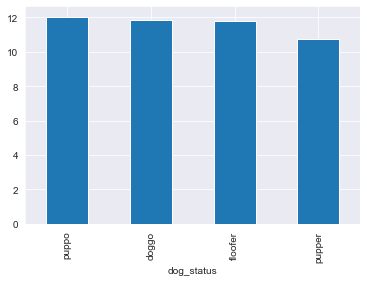

In [1777]:
status_df.groupby('dog_status')['rating'].mean().sort_values(ascending = False).head(10).plot(kind='bar');

**Conclusion:** From the plot above we see that the average rating for three categories (puppo, doggo and floofer) is almost the same - around 12 with `puppo` having the highest average rating. `pupper` has the lowest average rating of below 11.

<a is = 'question_4'>4) Question 4: What is the distribution of ratings? Which rating is most common?</a>

In [1778]:
master_df['rating'].value_counts(ascending = False)

12    484
10    435
11    416
13    287
9     153
8     98 
7     51 
14    39 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
0     1  
Name: rating, dtype: int64

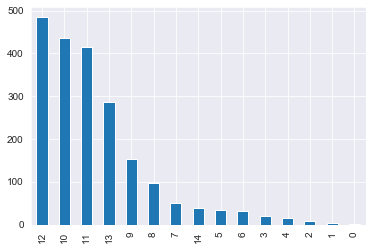

In [1779]:
master_df['rating'].value_counts().plot(kind='bar');

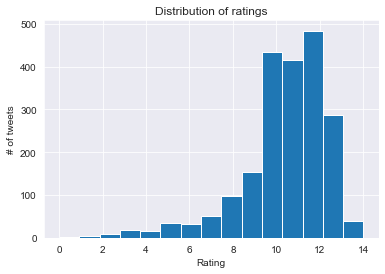

In [1780]:
master_df['rating'].plot(kind = 'hist', bins = 15)
plt.ylabel('# of tweets')
plt.xlabel('Rating')
plt.title('Distribution of ratings')
plt.show();

**Conclusion:** The distribution of ratings is not normal. The most common ratings are 12, 10 and 11. The ratings below 10 are not common.

## <a id = 'conclusion'>Conclusions</a>

In this project I used the knowledge gained in the Data Wrangling lesson of Udacity's Data Analyst Nanodegree to implement the following:
- Gathering data about dog ratings from three different source and in three different formats
- Assessing the gathered data both visually and programmatically and detected some quality and tidiness issues
- Cleaning the issued detected in order to perform the subsequent analysis
- Storing the cleaned master dataset in a csv master file
- Analysing and Visualisating the dataset
- Drawing conclusions based on the analysis performed